In [1]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from models import MarkowitzMinVarianceModel, SharpeRatioMaxModel

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn') # style.use('ggplot') # style.use('fivethirtyeight')
%matplotlib inline

# pandas precision
pd.options.display.precision = 4

In [2]:
!ls -l ../data/tmp

total 112
-rw-r--r-- 1 uchiumi uchiumi   790 Nov 27 19:29 ror.csv
-rw-r--r-- 1 uchiumi uchiumi     0 Nov 27 18:57 ror.csv:Zone.Identifier
-rw-r--r-- 1 uchiumi uchiumi   798 Nov 27 19:29 sr.csv
-rw-r--r-- 1 uchiumi uchiumi     0 Nov 27 18:57 sr.csv:Zone.Identifier
-rw-r--r-- 1 uchiumi uchiumi   838 Nov 27 19:29 std.csv
-rw-r--r-- 1 uchiumi uchiumi     0 Nov 27 18:57 std.csv:Zone.Identifier
-rw-r--r-- 1 uchiumi uchiumi 59283 Nov 12 22:37 tse_topix500_20201031.csv
-rw-r--r-- 1 uchiumi uchiumi  3796 Nov 13 23:59 tse_topixcore30_20111031.csv
-rw-r--r-- 1 uchiumi uchiumi  3768 Nov 13 23:59 tse_topixcore30_20121031.csv
-rw-r--r-- 1 uchiumi uchiumi  3729 Nov 13 23:59 tse_topixcore30_20131031.csv
-rw-r--r-- 1 uchiumi uchiumi  3767 Nov 13 23:59 tse_topixcore30_20141031.csv
-rw-r--r-- 1 uchiumi uchiumi  3790 Nov 13 23:59 tse_topixcore30_20151031.csv
-rw-r--r-- 1 uchiumi uchiumi  3746 Nov 13 23:59 tse_topixcore30_20161031.csv
-rw-r--r-- 1 uchiumi uchiumi  3769 Nov 13 23:59 tse_topixcore30_20171031

In [3]:
df_ror = pd.read_csv("../data/tmp/ror.csv")
df_std = pd.read_csv("../data/tmp/std.csv")
df_sr = pd.read_csv("../data/tmp/sr.csv")

In [4]:
df_ror

model    2011    2012    2013  \
0     Mean-Variance Model (TOPIX Core30, 12 months) -0.0001 -0.0444  0.5524   
1     Mean-Variance Model (TOPIX Core30, 36 months) -0.0001 -0.0409  0.4398   
2     Mean-Variance Model (TOPIX Core30, 60 months) -0.0001 -0.0447  0.4192   
3  Sharpe-Ratio-Max Model (TOPIX Core30, 12 months)  0.0142  0.1860  0.5911   
4  Sharpe-Ratio-Max Model (TOPIX Core30, 36 months)  0.0096  0.2108  0.5452   
5  Sharpe-Ratio-Max Model (TOPIX Core30, 60 months)  0.0106  0.0732  0.5650   

     2014    2015    2016    2017    2018    2019    2020  
0  0.2448  0.0952 -0.0970  0.2486 -0.0097  0.0254 -0.1793  
1  0.1991  0.1576 -0.0413  0.2349 -0.0350  0.0803 -0.1930  
2  0.1570  0.2255 -0.1148  0.3116 -0.1211  0.0713 -0.1336  
3  0.1417  0.0540 -0.0982  0.2717  0.0284  0.0056 -0.1764  
4  0.0980  0.1134 -0.0751  0.3753 -0.1944  0.0015  0.0470  
5  0.0690  0.0897 -0.0956  0.2870 -0.1616  0.1612  0.0925

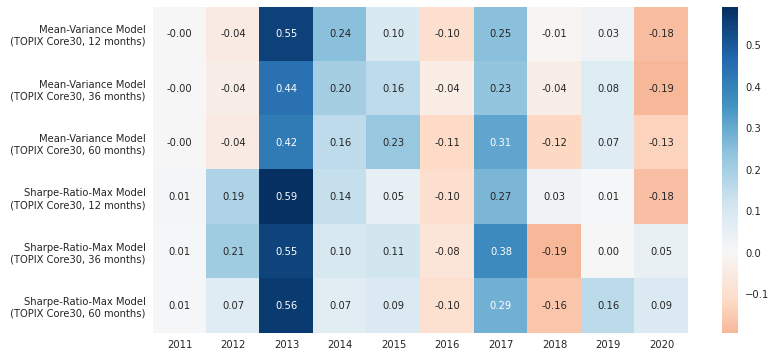

In [5]:
df = df_ror
ylabels=[str(c).replace("Model", "Model\n") for c in df["model"].values]

plt.figure(figsize=(12,6))
sns.heatmap(df.drop("model", axis=1), cmap="RdBu", center=0, annot=True, fmt=".2f", cbar=True, yticklabels=ylabels)
plt.savefig("../figures/portfolio_returns_hm.png", bbox_inches="tight")

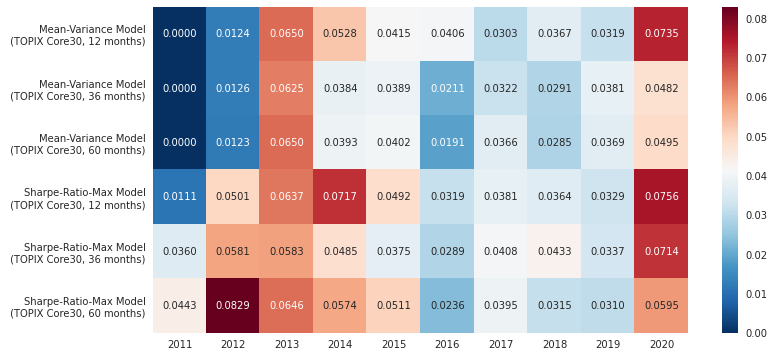

In [6]:
df = df_std
ylabels=[str(c).replace("Model", "Model\n") for c in df["model"].values]

plt.figure(figsize=(12,6))
sns.heatmap(df.drop("model", axis=1), cmap="RdBu_r", vmin=0.0, annot=True, fmt=".4f", cbar=True, yticklabels=ylabels)
plt.savefig("../figures/portfolio_risk_hm.png", bbox_inches="tight")

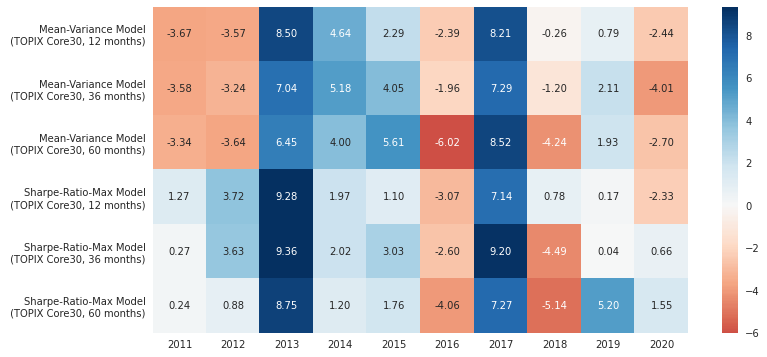

In [7]:
df = df_sr
ylabels=[str(c).replace("Model", "Model\n") for c in df["model"].values]

plt.figure(figsize=(12,6))
sns.heatmap(df.drop("model", axis=1), cmap="RdBu", center=0, annot=True, fmt=".2f", cbar=True, yticklabels=ylabels)
plt.savefig("../figures/portfolio_sharperatio_hm.png", bbox_inches="tight")

In [21]:
# TOPIX Index
df_tpx = pd.read_csv("../data/tse_topix_20040331-20201031.csv")
df_tpx['Date'] = pd.to_datetime(df_tpx["Date"])
df_tpx = df_tpx.set_index("Date")
df_tpx = df_tpx[df_tpx.index >= "2011-10-31"]

# TOPIX Core30 
df_tpx30 = pd.read_csv("../data/tse_topixcore30_20001031-202010131.csv")
df_tpx30['Date'] = pd.to_datetime(df_tpx30["Date"])
df_tpx30 = df_tpx30.set_index('Date')
df_tpx30 = df_tpx30[df_tpx30.index >= "2011-10-31"]

# TOPIX 500
df_tpx500 = pd.read_csv("../data/tse_topix500_20001031-202010131.csv")
df_tpx500['Date'] = pd.to_datetime(df_tpx500["Date"])
df_tpx500 = df_tpx500.set_index('Date')
df_tpx500 = df_tpx500[df_tpx500.index >= "2011-10-31"]

# Risk-free rate (10Year-JGB, monthly interest)
jgb_int = 0.0001 # 0.01% per year (Japanese Government Bond)
r_f = jgb_int * (1/12) # adjust monthly

In [32]:
df = df_tpx

df = df.pct_change()
df = df.resample('y').sum()
display(df)
print("mean", df["^TPX"].mean())
print("std", df["^TPX"].std(ddof=True))
print("sharperatio", (df["^TPX"].mean() - r_f) / df["^TPX"].std(ddof=True))

^TPX
Date              
2011-12-31 -0.0236
2012-12-31  0.1159
2013-12-31  0.4621
2014-12-31  0.1290
2015-12-31  0.1058
2016-12-31 -0.0071
2017-12-31  0.1771
2018-12-31 -0.1386
2019-12-31  0.1025
2020-12-31 -0.0359

mean 0.08871322085367873
std 0.16297264048722993
sharperatio 0.544293123404944


In [31]:
df = df_tpx30

df["ror"] = df.pct_change().mean(axis='columns')
df = df[["ror"]]
df = df.resample('y').sum()
display(df)

print("mean", df["ror"].mean())
print("std", df["ror"].std(ddof=True))
print("sharperatio", (df["ror"].mean() - r_f) / df["ror"].std(ddof=True))

ror
Date              
2011-12-31 -0.0453
2012-12-31 -1.2044
2013-12-31  0.5295
2014-12-31 -0.4094
2015-12-31  4.1623
2016-12-31 -0.1738
2017-12-31  2.1762
2018-12-31 -0.1034
2019-12-31  1.8004
2020-12-31 -1.8208

mean 0.4911392101180468
std 1.7684525988917033
sharperatio 0.27771786311519303


In [33]:
df = df_tpx500

df["ror"] = df.pct_change().mean(axis='columns')
df = df[["ror"]]
df = df.resample('y').sum()
display(df)

print("mean", df["ror"].mean())
print("std", df["ror"].std(ddof=True))
print("sharperatio", (df["ror"].mean() - r_f) / df["ror"].std(ddof=True))

ror
Date              
2011-12-31 -0.0223
2012-12-31  0.0861
2013-12-31  0.4537
2014-12-31  0.1497
2015-12-31  0.1509
2016-12-31  0.0270
2017-12-31  0.1877
2018-12-31 -0.1572
2019-12-31  0.0832
2020-12-31 -0.1064

mean 0.08524238013328223
std 0.17164675999748435
sharperatio 0.4965665929330567


In [39]:
import pandas_datareader
from datetime import datetime


def get_df(symbol):
    df = pandas_datareader.data.DataReader(symbol, 'yahoo', st, ed) # daily
    df = df.sort_values(by='Date', ascending=True)
    df = df.resample('M').mean() # daily -> monthly
    df = df.fillna(method='ffill') # 1つ前の行の値で埋める
    df = df[['Close']].rename(columns={'Close': symbol})
    return df

# df: time-series price data of stocks in `symbols_tpx500`
st = datetime(2011, 10, 31)
ed = datetime(2020, 10, 31)
symbol='^N225'
df_n225 = get_df(symbol)
df_n225 

^N225
Date                  
2011-10-31   8988.3896
2011-11-30   8506.1050
2011-12-31   8505.9919
2012-01-31   8616.7089
2012-02-29   9242.3271
...                ...
2020-06-30  22486.9345
2020-07-31  22529.4743
2020-08-31  22901.4459
2020-09-30  23306.9459
2020-10-31  23464.1249

[109 rows x 1 columns]

In [40]:
df = df_n225

df = df.pct_change()
df = df.resample('y').sum()
display(df)
print("mean", df["^N225"].mean())
print("std", df["^N225"].std(ddof=True))
print("sharperatio", (df["^N225"].mean() - r_f) / df["^N225"].std(ddof=True))

^N225
Date              
2011-12-31 -0.0537
2012-12-31  0.1570
2013-12-31  0.4965
2014-12-31  0.1253
2015-12-31  0.1023
2016-12-31  0.0052
2017-12-31  0.1837
2018-12-31 -0.0725
2019-12-31  0.1237
2020-12-31  0.0175

mean 0.10851046691089594
std 0.16230368741569945
sharperatio 0.6685130529392231


In [ ]:
df = df_tpx
df = df.pct_change()
df = df.resample('y').sum()
df

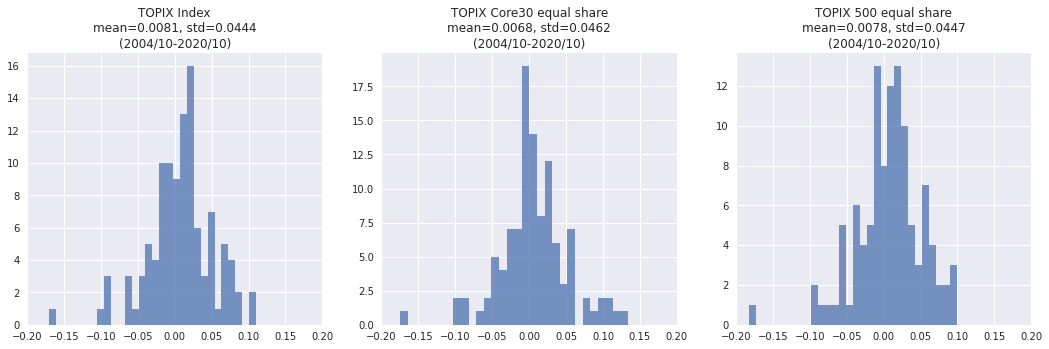

In [9]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
df = df_tpx
df_chg = df.pct_change()
df_chg[:1] = 0
x = df_chg.mean(axis='columns').values
plt.hist(x, bins=30, alpha=0.75)
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.xlim([-0.2, 0.2])
plt.title(f"TOPIX Index\nmean={r_mean}, std={r_std}\n(2004/10-2020/10)")


plt.subplot(1,3,2)
df = df_tpx30
df_chg = df.pct_change()
df_chg[:1] = 0
x = df_chg.mean(axis='columns').values
plt.hist(x, bins=30, alpha=0.75)
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.xlim([-0.2, 0.2])
plt.title(f"TOPIX Core30 equal share\nmean={r_mean}, std={r_std}\n(2004/10-2020/10)")


plt.subplot(1,3,3)
df = df_tpx500
df_chg = df.pct_change()
df_chg[:1] = 0
x = df_chg.mean(axis='columns').values
plt.hist(x, bins=30, alpha=0.75)
r_mean = "{:.4f}".format(x.mean())
r_std = "{:.4f}".format(x.std())
plt.xlim([-0.2, 0.2])
plt.title(f"TOPIX 500 equal share\nmean={r_mean}, std={r_std}\n(2004/10-2020/10)")


plt.show()
# # plt.savefig("../figures/topix_ror_dist_20041031-20201031.png", bbox_inches="tight")